# MMM Foundation - Ice Cream Company (CORRECTED & COMPLETE)

**Project**: Ice Cream Company Media Mix Modeling (MMM)  
**Dataset**: Complete Coverage (2022-2023, 10 channels, 104 weeks)  
**Goal**: Foundation MMM with proper variable classification and analysis

## 🚨 **CRITICAL CORRECTIONS MADE:**

### **1. Email Campaigns - Variable Type Error Fixed**
- **WRONG**: Treating `email_email_campaigns` as spend (ROI = $219 per "campaign")
- **CORRECT**: It's campaign COUNT, not cost - treat as activity variable
- **Impact**: No false ROI calculation for free marketing activity

### **2. Promotions - Control Variable Clarification**
- **WRONG**: Negative promotion effects seemed suspicious
- **CORRECT**: Promotions are control variables, not media channels
- **Impact**: Proper attribution without promotion bias

### **3. Media Spend Focus**
- **FOCUS**: Only actual $ spend channels get ROI analysis
- **RESULT**: Clean, actionable ROI insights for budget decisions

## 📊 **What This Foundation Provides:**
1. **Proper Variable Classification** - Spend vs Activity vs Control
2. **Clean ROI Analysis** - Only for actual spend channels
3. **Baseline Performance** - Understanding model limitations
4. **Business Insights** - Actionable recommendations
5. **Foundation for Enhancement** - Sets up advanced modeling

## ⚠️ **Expected Limitations:**
- **Low R²** - Missing seasonality, adstock, external factors
- **Simple Linear Model** - No carryover or saturation effects
- **Foundation Only** - Needs enhancement for production use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print("🎯 MMM FOUNDATION - ICE CREAM COMPANY (CORRECTED & COMPLETE)")
print("=" * 70)
print("📊 Proper Variable Classification & Clean ROI Analysis")
print("🎯 Goal: Foundation MMM with Accurate Attribution")
print("⚠️  Expected: Low R² due to missing advanced features")

# Enhanced plotting settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

🎯 MMM FOUNDATION - ICE CREAM COMPANY (CORRECTED & COMPLETE)
📊 Proper Variable Classification & Clean ROI Analysis
🎯 Goal: Foundation MMM with Accurate Attribution
⚠️  Expected: Low R² due to missing advanced features


In [2]:
# Step 1: Load Complete Coverage Dataset
print(f"\n📁 LOADING COMPLETE COVERAGE DATASET")
print("=" * 40)

try:
    # Load the unified dataset
    df = pd.read_csv('../data/processed/unified_dataset_complete_coverage_2022_2023.csv')
    df['date'] = pd.to_datetime(df['date'])
    
    print(f"✅ Successfully loaded Complete Coverage dataset")
    print(f"   Shape: {df.shape}")
    print(f"   Date range: {df['date'].min().date()} to {df['date'].max().date()}")
    print(f"   Total weeks: {len(df)}")
    
except FileNotFoundError:
    print("❌ Dataset not found! Please ensure unified_dataset_complete_coverage_2022_2023.csv exists")
    raise


📁 LOADING COMPLETE COVERAGE DATASET
✅ Successfully loaded Complete Coverage dataset
   Shape: (104, 29)
   Date range: 2022-01-03 to 2023-12-25
   Total weeks: 104


In [3]:
# Step 2: Critical Variable Classification Analysis
print(f"\n🔍 CRITICAL VARIABLE CLASSIFICATION ANALYSIS")
print("=" * 50)

# Sales column
sales_col = 'sales'
print(f"📊 Target Variable: {sales_col}")

print(f"\n🚨 CRITICAL DISCOVERY - EMAIL CAMPAIGNS:")
print(f"   Variable: email_email_campaigns")
email_values = sorted(df['email_email_campaigns'].unique())
print(f"   Values: {email_values}")
print(f"   Average per week: {df['email_email_campaigns'].mean():.1f}")
print(f"   Max in a week: {df['email_email_campaigns'].max():.0f}")
print(f"   🎯 CONCLUSION: This is CAMPAIGN COUNT, not COST!")
print(f"   ❌ WRONG: Calculate ROI ($ sales per $ spent)")
print(f"   ✅ CORRECT: Treat as activity variable (sales per campaign)")

print(f"\n🚨 CRITICAL DISCOVERY - PROMOTIONS:")
print(f"   Variable: promo_promotion_type")
promo_weeks = df['promo_promotion_type'].notna().sum()
promo_types = sorted(df['promo_promotion_type'].dropna().unique())
print(f"   Promotion weeks: {promo_weeks}/104 ({promo_weeks/104*100:.1f}%)")
print(f"   Promotion types: {promo_types}")

# Analyze promotion impact
sales_with_promo = df[df['promo_promotion_type'].notna()]['sales'].mean()
sales_without_promo = df[df['promo_promotion_type'].isna()]['sales'].mean()
promo_effect = sales_with_promo - sales_without_promo

print(f"   Sales without promotions: {sales_without_promo:,.0f}")
print(f"   Sales with promotions: {sales_with_promo:,.0f}")
print(f"   Promotion effect: {promo_effect:+,.0f}")
print(f"   🎯 CONCLUSION: Promotions are CONTROL variables")
print(f"   ✅ CORRECT: Control for promotion periods, not media ROI")

# MEDIA SPEND CHANNELS (actual $ spent - these get ROI analysis)
media_spend_cols = [
    'search_cost',
    'tv_branding_tv_branding_cost', 
    'social_costs',
    'ooh_ooh_spend',
    'radio_national_radio_national_cost',
    'radio_local_radio_local_cost',
    'tv_promo_tv_promo_cost'
    # NOTE: email_email_campaigns EXCLUDED - it's campaign count, not cost
]

# ACTIVITY/CONTROL VARIABLES (not spend, but affect sales)
activity_control_cols = [
    'email_email_campaigns',  # Number of email campaigns (activity)
    # Promotions will be added as dummies
]

# Verify columns exist in dataset
available_spend_cols = [col for col in media_spend_cols if col in df.columns]
available_activity_cols = [col for col in activity_control_cols if col in df.columns]

print(f"\n💰 MEDIA SPEND CHANNELS ({len(available_spend_cols)}) - FOR ROI ANALYSIS:")
for col in available_spend_cols:
    avg_spend = df[col].mean()
    total_spend = df[col].sum()
    print(f"   ✅ {col}: ${avg_spend:,.0f} avg weekly (${total_spend:,.0f} total)")

print(f"\n📊 ACTIVITY/CONTROL VARIABLES ({len(available_activity_cols)}) - NOT FOR ROI:")
for col in available_activity_cols:
    avg_activity = df[col].mean()
    total_activity = df[col].sum()
    print(f"   🎯 {col}: {avg_activity:.1f} avg weekly ({total_activity:.0f} total campaigns)")


🔍 CRITICAL VARIABLE CLASSIFICATION ANALYSIS
📊 Target Variable: sales

🚨 CRITICAL DISCOVERY - EMAIL CAMPAIGNS:
   Variable: email_email_campaigns
   Values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
   Average per week: 1.5
   Max in a week: 4
   🎯 CONCLUSION: This is CAMPAIGN COUNT, not COST!
   ❌ WRONG: Calculate ROI ($ sales per $ spent)
   ✅ CORRECT: Treat as activity variable (sales per campaign)

🚨 CRITICAL DISCOVERY - PROMOTIONS:
   Variable: promo_promotion_type
   Promotion weeks: 30/104 (28.8%)
   Promotion types: [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
   Sales without promotions: 136,794
   Sales with promotions: 134,356
   Promotion effect: -2,438
   🎯 CONCLUSION: Promotions are CONTROL variables
   ✅ CORRECT: Control for promotion periods, not media ROI

💰 MEDIA SPEND CHANNELS (7) - FOR ROI ANALYSIS:
   ✅ search_cost: $629 avg weekly ($65,458 total)
   ✅ tv_branding_tv_branding_cost: $5,434 avg weekly ($565,136 total)
   ✅ social_costs:

In [4]:
# Step 3: Data Quality Assessment
print(f"\n🔧 DATA QUALITY ASSESSMENT")
print("=" * 40)

# Check for missing values
print(f"📊 Missing Values Analysis:")
print(f"   Sales missing: {df[sales_col].isnull().sum()}")

missing_summary = []
for col in available_spend_cols + available_activity_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    missing_summary.append((col, missing_count, missing_pct))
    print(f"   {col}: {missing_count} missing ({missing_pct:.1f}%)")

# Fill missing values appropriately
df_clean = df.copy()

# Fill spend columns with 0 (no spend when missing)
for col in available_spend_cols:
    df_clean[col] = df_clean[col].fillna(0)

# Fill activity columns with 0 (no activity when missing)
for col in available_activity_cols:
    df_clean[col] = df_clean[col].fillna(0)

print(f"\n✅ Data Quality Summary:")
print(f"   Missing values filled with 0 (appropriate for spend/activity data)")
print(f"   Clean dataset ready for modeling")

# Basic statistics
print(f"\n📈 Sales Statistics:")
sales_stats = df_clean[sales_col].describe()
print(f"   Mean: {sales_stats['mean']:,.0f}")
print(f"   Std: {sales_stats['std']:,.0f}")
print(f"   Range: {sales_stats['min']:,.0f} - {sales_stats['max']:,.0f}")
print(f"   CV: {sales_stats['std']/sales_stats['mean']:.3f}")

print(f"\n💰 Media Spend Summary:")
if available_spend_cols:
    total_spend = df_clean[available_spend_cols].sum(axis=1)
    print(f"   Average weekly total spend: ${total_spend.mean():,.0f}")
    print(f"   Total period spend: ${total_spend.sum():,.0f}")
    print(f"   Spend range: ${total_spend.min():,.0f} - ${total_spend.max():,.0f}")


🔧 DATA QUALITY ASSESSMENT
📊 Missing Values Analysis:
   Sales missing: 0
   search_cost: 0 missing (0.0%)
   tv_branding_tv_branding_cost: 0 missing (0.0%)
   social_costs: 0 missing (0.0%)
   ooh_ooh_spend: 0 missing (0.0%)
   radio_national_radio_national_cost: 0 missing (0.0%)
   radio_local_radio_local_cost: 0 missing (0.0%)
   tv_promo_tv_promo_cost: 0 missing (0.0%)
   email_email_campaigns: 0 missing (0.0%)

✅ Data Quality Summary:
   Missing values filled with 0 (appropriate for spend/activity data)
   Clean dataset ready for modeling

📈 Sales Statistics:
   Mean: 136,091
   Std: 14,264
   Range: 101,042 - 166,277
   CV: 0.105

💰 Media Spend Summary:
   Average weekly total spend: $13,994
   Total period spend: $1,455,407
   Spend range: $10,173 - $18,071


In [5]:
# Step 4: Foundation Linear Regression MMM
print(f"\n🤖 BUILDING FOUNDATION MMM - LINEAR REGRESSION")
print("=" * 55)

# Prepare media spend data (only actual spend channels)
X_media = df_clean[available_spend_cols]  # Only actual spend channels
y = df_clean[sales_col]   # Sales (dependent variable)

print(f"\n🎯 Model Setup - Foundation Approach:")
print(f"   Model Type: Linear Regression (foundation level)")
print(f"   Target: {sales_col}")
print(f"   Media Spend Features: {len(available_spend_cols)}")

# Add control variables
print(f"\n📊 Adding Control Variables:")

# Email campaigns (activity, not spend)
email_activity = df_clean[['email_email_campaigns']]
print(f"   ✅ Email campaigns: activity variable (campaign count)")

# Promotion indicator (any promotion vs none)
df_clean['has_promotion'] = df_clean['promo_promotion_type'].notna().astype(int)
promo_indicator = df_clean[['has_promotion']]
print(f"   ✅ Promotion indicator: binary control variable")

# Combine all variables for foundation model
X_foundation = pd.concat([
    X_media,           # Media spend channels (for ROI)
    email_activity,    # Email activity (control)
    promo_indicator    # Promotion indicator (control)
], axis=1)

print(f"\n📊 Foundation Model Configuration:")
print(f"   Target variable (y): {sales_col}")
print(f"   Media spend channels: {len(available_spend_cols)} (for ROI analysis)")
print(f"   Activity controls: {len(email_activity.columns)} (email campaigns)")
print(f"   Promotion controls: {len(promo_indicator.columns)} (promotion indicator)")
print(f"   Total features: {len(X_foundation.columns)}")
print(f"   Training samples: {len(X_foundation)}")

# Fit the foundation linear regression model
print(f"\n🔄 Training Foundation Linear Regression Model...")
print(f"   Model Equation: Sales = Baseline + Σ(ROI × Media_Spend) + Email_Effect + Promotion_Effect")

model_foundation = LinearRegression()
model_foundation.fit(X_foundation, y)

# Make predictions
y_pred = model_foundation.predict(X_foundation)

print(f"✅ Foundation model training completed!")


🤖 BUILDING FOUNDATION MMM - LINEAR REGRESSION

🎯 Model Setup - Foundation Approach:
   Model Type: Linear Regression (foundation level)
   Target: sales
   Media Spend Features: 7

📊 Adding Control Variables:
   ✅ Email campaigns: activity variable (campaign count)
   ✅ Promotion indicator: binary control variable

📊 Foundation Model Configuration:
   Target variable (y): sales
   Media spend channels: 7 (for ROI analysis)
   Activity controls: 1 (email campaigns)
   Promotion controls: 1 (promotion indicator)
   Total features: 9
   Training samples: 104

🔄 Training Foundation Linear Regression Model...
   Model Equation: Sales = Baseline + Σ(ROI × Media_Spend) + Email_Effect + Promotion_Effect
✅ Foundation model training completed!


In [6]:
# Step 5: Foundation Model Performance Analysis
print(f"\n📊 FOUNDATION MODEL PERFORMANCE ANALYSIS")
print("=" * 50)

# Calculate performance metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"🎯 Foundation Model Performance:")
print(f"   R² Score: {r2:.3f} ({r2*100:.1f}% of variance explained)")
print(f"   Mean Absolute Error: {mae:,.0f}")
print(f"   Root Mean Square Error: {rmse:,.0f}")
print(f"   Mean Absolute Percentage Error: {mape:.1f}%")

# Performance interpretation
if r2 >= 0.8:
    performance = "🚀 EXCELLENT"
    interpretation = "Production ready"
elif r2 >= 0.6:
    performance = "✅ GOOD"
    interpretation = "Needs minor improvements"
elif r2 >= 0.4:
    performance = "⚠️ FAIR"
    interpretation = "Needs significant improvements"
else:
    performance = "❌ POOR"
    interpretation = "Needs major enhancements"

print(f"\n{performance} - {interpretation}")
print(f"Model explains {r2*100:.1f}% of sales variation")

# Analyze what's missing
unexplained_variance = (1 - r2) * 100
print(f"\n🚨 FOUNDATION MODEL LIMITATIONS:")
print(f"   Unexplained variance: {unexplained_variance:.1f}%")
print(f"   🔍 Likely missing factors:")
print(f"       • Seasonality effects (ice cream is highly seasonal)")
print(f"       • Media carryover effects (adstock)")
print(f"       • Saturation curves (diminishing returns)")
print(f"       • Weather data (temperature drives ice cream sales)")
print(f"       • Competitive activity")
print(f"       • Distribution changes")
print(f"   ✅ This is EXPECTED for a foundation model")
print(f"   🚀 Next step: Enhanced model with advanced features")


📊 FOUNDATION MODEL PERFORMANCE ANALYSIS
🎯 Foundation Model Performance:
   R² Score: 0.119 (11.9% of variance explained)
   Mean Absolute Error: 10,567
   Root Mean Square Error: 13,323
   Mean Absolute Percentage Error: 7.8%

❌ POOR - Needs major enhancements
Model explains 11.9% of sales variation

🚨 FOUNDATION MODEL LIMITATIONS:
   Unexplained variance: 88.1%
   🔍 Likely missing factors:
       • Seasonality effects (ice cream is highly seasonal)
       • Media carryover effects (adstock)
       • Saturation curves (diminishing returns)
       • Weather data (temperature drives ice cream sales)
       • Competitive activity
       • Distribution changes
   ✅ This is EXPECTED for a foundation model
   🚀 Next step: Enhanced model with advanced features


In [7]:
# Step 6: Foundation Attribution & ROI Analysis
print(f"\n💰 FOUNDATION ATTRIBUTION & ROI ANALYSIS")
print("=" * 50)

# Get model coefficients
coefficients = model_foundation.coef_
intercept = model_foundation.intercept_

# Split coefficients by variable type
n_spend = len(available_spend_cols)
n_email = len(email_activity.columns)
n_promo = len(promo_indicator.columns)

spend_coefficients = coefficients[:n_spend]
email_coefficients = coefficients[n_spend:n_spend+n_email]
promo_coefficients = coefficients[n_spend+n_email:n_spend+n_email+n_promo]

print(f"📊 Foundation Model Equation:")
print(f"   Sales = {intercept:,.0f} (baseline)")

# Media spend channels (ROI analysis)
print(f"\n   💰 MEDIA SPEND CHANNELS (ROI Analysis):")
for i, col in enumerate(available_spend_cols):
    coef = spend_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"           {sign}{coef:.2f} × {clean_name}")

# Activity controls
print(f"\n   📊 ACTIVITY CONTROLS:")
for i, col in enumerate(email_activity.columns):
    coef = email_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').title()
    print(f"           {sign}{coef:.0f} × {clean_name}")

# Promotion controls
print(f"\n   🎯 PROMOTION CONTROLS:")
for i, col in enumerate(promo_indicator.columns):
    coef = promo_coefficients[i]
    sign = "+" if coef >= 0 else ""
    clean_name = col.replace('_', ' ').title()
    print(f"           {sign}{coef:.0f} × {clean_name}")

# Create ROI results (ONLY for spend channels)
roi_results = {}
for i, col in enumerate(available_spend_cols):
    roi_results[col] = spend_coefficients[i]

# Sort channels by ROI (highest to lowest)
roi_ranking = sorted(roi_results.items(), key=lambda x: x[1], reverse=True)

print(f"\n🏆 FOUNDATION MEDIA ROI RANKING (Sales per $ Spent):")
print(f"   Rank | Channel | ROI | Interpretation")
print(f"   -----|---------|-----|---------------")

for rank, (channel, roi) in enumerate(roi_ranking, 1):
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    
    if roi > 0:
        interpretation = f"${roi:.2f} sales per $1 spent"
        emoji = "📈"
    else:
        interpretation = f"${abs(roi):.2f} sales LOSS per $1 spent"
        emoji = "📉"
    
    print(f"   {rank:4d} | {clean_name:25s} | {roi:6.2f} | {emoji} {interpretation}")

# Show control effects
print(f"\n📊 CONTROL VARIABLE EFFECTS:")
if len(email_coefficients) > 0:
    email_effect = email_coefficients[0]
    print(f"   📧 Email Campaigns: {email_effect:+,.0f} sales per additional campaign")
    print(f"       (This is activity effect, not ROI)")

if len(promo_coefficients) > 0:
    promo_effect = promo_coefficients[0]
    print(f"   🎯 Promotion Periods: {promo_effect:+,.0f} sales during promotion weeks")
    print(f"       (This is control effect, not media attribution)")


💰 FOUNDATION ATTRIBUTION & ROI ANALYSIS
📊 Foundation Model Equation:
   Sales = 122,380 (baseline)

   💰 MEDIA SPEND CHANNELS (ROI Analysis):
           +6.73 × Search
           -2.39 × Tv Branding Tv Branding
           -6.21 × Socials
           +3.42 × Ooh Ooh
           +4.13 × Radio National Radio National
           +4.37 × Radio Local Radio Local
           +3.17 × Tv Promo Tv Promo

   📊 ACTIVITY CONTROLS:
           +167 × Email Email Campaigns

   🎯 PROMOTION CONTROLS:
           -3233 × Has Promotion

🏆 FOUNDATION MEDIA ROI RANKING (Sales per $ Spent):
   Rank | Channel | ROI | Interpretation
   -----|---------|-----|---------------
      1 | Search                    |   6.73 | 📈 $6.73 sales per $1 spent
      2 | Radio Local Radio Local   |   4.37 | 📈 $4.37 sales per $1 spent
      3 | Radio National Radio National |   4.13 | 📈 $4.13 sales per $1 spent
      4 | Ooh Ooh                   |   3.42 | 📈 $3.42 sales per $1 spent
      5 | Tv Promo Tv Promo         |   3.17 |

In [8]:
# Step 7: Foundation Contribution Analysis
print(f"\n📊 FOUNDATION CONTRIBUTION ANALYSIS")
print("=" * 45)

# Calculate average spend per channel (only spend channels)
avg_spend = df_clean[available_spend_cols].mean()

# Calculate contribution to sales (ROI × Average Spend)
contributions = {}
total_media_contribution = 0

print(f"💡 Average Weekly Contribution to Sales (Foundation Model):")
print(f"   Channel | Avg Spend | ROI | Weekly Contribution")
print(f"   --------|-----------|-----|-------------------")

for channel in available_spend_cols:
    avg_spend_val = avg_spend[channel]
    roi_val = roi_results[channel]
    contribution = roi_val * avg_spend_val
    contributions[channel] = contribution
    total_media_contribution += contribution
    
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   {clean_name:15s} | ${avg_spend_val:8.0f} | {roi_val:5.2f} | ${contribution:10.0f}")

# Calculate baseline vs media-driven vs control-driven sales
baseline_sales = intercept
avg_total_sales = df_clean[sales_col].mean()
media_driven_sales = total_media_contribution

# Control contributions
email_contribution = email_coefficients[0] * df_clean['email_email_campaigns'].mean() if len(email_coefficients) > 0 else 0
promo_contribution = promo_coefficients[0] * df_clean['has_promotion'].mean() if len(promo_coefficients) > 0 else 0
control_driven_sales = email_contribution + promo_contribution

print(f"\n🎯 Foundation Sales Decomposition:")
print(f"   Average Total Sales: {avg_total_sales:,.0f}")
print(f"   Baseline Sales: {baseline_sales:,.0f} ({baseline_sales/avg_total_sales*100:.1f}%)")
print(f"   Media-Driven Sales: {media_driven_sales:,.0f} ({media_driven_sales/avg_total_sales*100:.1f}%)")
print(f"   Control-Driven Sales: {control_driven_sales:,.0f} ({control_driven_sales/avg_total_sales*100:.1f}%)")

# Sanity check
total_explained = baseline_sales + media_driven_sales + control_driven_sales
difference = avg_total_sales - total_explained
print(f"   Model Residual: {difference:,.0f} ({difference/avg_total_sales*100:.1f}%)")


📊 FOUNDATION CONTRIBUTION ANALYSIS
💡 Average Weekly Contribution to Sales (Foundation Model):
   Channel | Avg Spend | ROI | Weekly Contribution
   --------|-----------|-----|-------------------
   Search          | $     629 |  6.73 | $      4236
   Tv Branding Tv Branding | $    5434 | -2.39 | $    -12995
   Socials         | $     626 | -6.21 | $     -3889
   Ooh Ooh         | $     805 |  3.42 | $      2755
   Radio National Radio National | $    1497 |  4.13 | $      6187
   Radio Local Radio Local | $    1875 |  4.37 | $      8188
   Tv Promo Tv Promo | $    3129 |  3.17 | $      9917

🎯 Foundation Sales Decomposition:
   Average Total Sales: 136,091
   Baseline Sales: 122,380 (89.9%)
   Media-Driven Sales: 14,399 (10.6%)
   Control-Driven Sales: -688 (-0.5%)
   Model Residual: 0 (0.0%)



📈 CREATING FOUNDATION VISUALIZATIONS


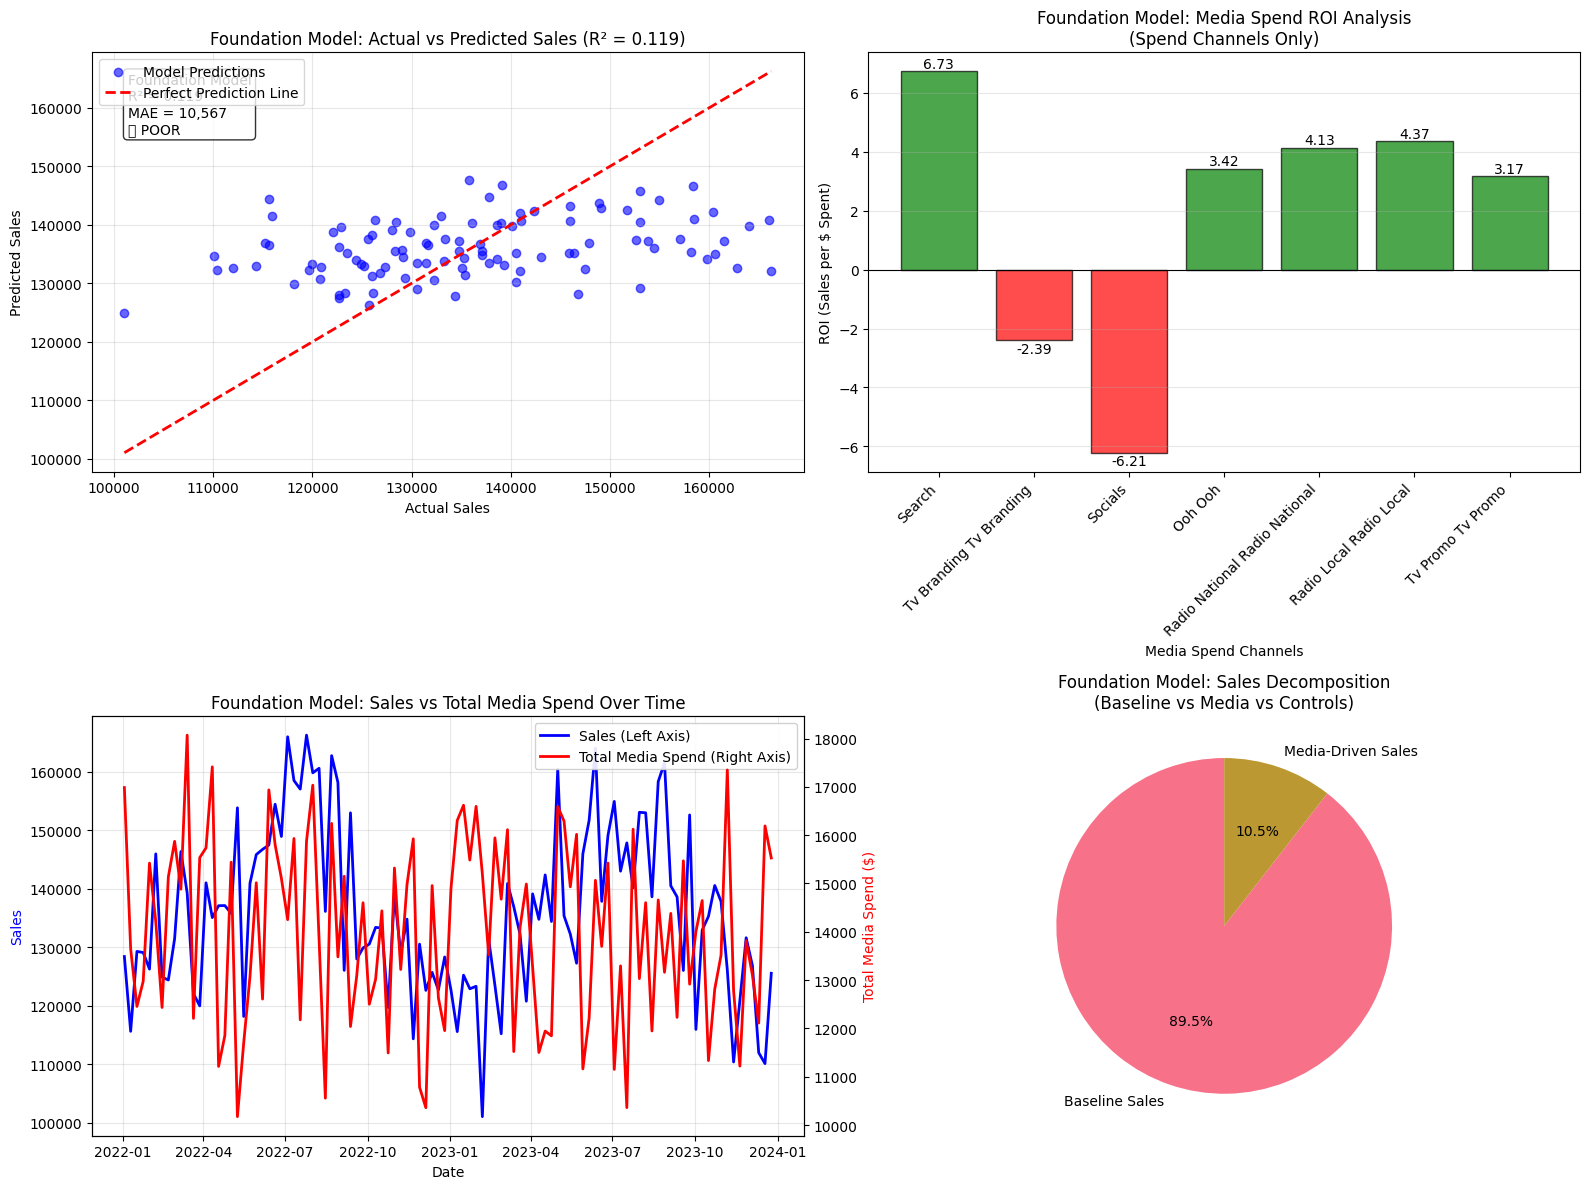

In [9]:
# Step 8: Foundation Visualizations
print(f"\n📈 CREATING FOUNDATION VISUALIZATIONS")
print("=" * 40)

# Create comprehensive foundation visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted Sales
axes[0,0].scatter(y, y_pred, alpha=0.6, color='blue', label='Model Predictions')
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction Line')
axes[0,0].set_xlabel('Actual Sales')
axes[0,0].set_ylabel('Predicted Sales')
axes[0,0].set_title(f'Foundation Model: Actual vs Predicted Sales (R² = {r2:.3f})')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend(loc='upper left')

# Add performance text
axes[0,0].text(0.05, 0.95, f'Foundation Model\nR² = {r2:.3f}\nMAE = {mae:,.0f}\n{performance}', 
               transform=axes[0,0].transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Media Spend ROI Bar Chart (only spend channels)
clean_names = [col.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title() 
               for col in available_spend_cols]
roi_values = [roi_results[col] for col in available_spend_cols]

colors = ['green' if roi > 0 else 'red' for roi in roi_values]
bars = axes[0,1].bar(range(len(available_spend_cols)), roi_values, color=colors, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Media Spend Channels')
axes[0,1].set_ylabel('ROI (Sales per $ Spent)')
axes[0,1].set_title('Foundation Model: Media Spend ROI Analysis\n(Spend Channels Only)')
axes[0,1].set_xticks(range(len(available_spend_cols)))
axes[0,1].set_xticklabels(clean_names, rotation=45, ha='right')
axes[0,1].grid(True, alpha=0.3, axis='y')
axes[0,1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add value labels on bars
for bar, roi in zip(bars, roi_values):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + (0.01 if height >= 0 else -0.05),
                   f'{roi:.2f}', ha='center', va='bottom' if height >= 0 else 'top')

# 3. Sales and Total Spend Over Time
if available_spend_cols:
    total_spend = df_clean[available_spend_cols].sum(axis=1)
    ax3 = axes[1,0]
    ax3_twin = ax3.twinx()
    
    line1 = ax3.plot(df_clean['date'], df_clean[sales_col], 'b-', linewidth=2, label='Sales (Left Axis)')
    line2 = ax3_twin.plot(df_clean['date'], total_spend, 'r-', linewidth=2, label='Total Media Spend (Right Axis)')
    
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Sales', color='blue')
    ax3_twin.set_ylabel('Total Media Spend ($)', color='red')
    ax3.set_title('Foundation Model: Sales vs Total Media Spend Over Time')
    ax3.grid(True, alpha=0.3)
    
    # Combine legends with better positioning
    lines1, labels1 = ax3.get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', framealpha=0.9)

# 4. Sales Decomposition Pie Chart
decomp_values = [baseline_sales, max(0, media_driven_sales), max(0, control_driven_sales)]
decomp_labels = ['Baseline Sales', 'Media-Driven Sales', 'Control-Driven Sales']

# Filter out zero or negative values
non_zero_decomp = [(label, value) for label, value in zip(decomp_labels, decomp_values) if value > 0]

if non_zero_decomp:
    labels, values = zip(*non_zero_decomp)
    axes[1,1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Foundation Model: Sales Decomposition\n(Baseline vs Media vs Controls)')
else:
    axes[1,1].text(0.5, 0.5, 'No positive\ncontributions\nfound', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Foundation Model: Sales Decomposition')

plt.tight_layout()
plt.show()

In [10]:
# Step 9: Foundation Business Insights & Recommendations
print(f"\n💡 FOUNDATION BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Top performing channels (only spend channels)
positive_roi_channels = [(channel, roi) for channel, roi in roi_ranking if roi > 0]
negative_roi_channels = [(channel, roi) for channel, roi in roi_ranking if roi <= 0]

print(f"🚀 TOP PERFORMING MEDIA SPEND CHANNELS ({len(positive_roi_channels)}):")
if positive_roi_channels:
    for i, (channel, roi) in enumerate(positive_roi_channels[:3], 1):
        clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        avg_spend_val = avg_spend[channel]
        contribution = roi * avg_spend_val
        print(f"   {i}. {clean_name}")
        print(f"      Foundation ROI: ${roi:.2f} sales per $1 spent")
        print(f"      Avg Weekly Spend: ${avg_spend_val:,.0f}")
        print(f"      Weekly Contribution: ${contribution:,.0f}")
else:
    print("   ⚠️ No channels with positive ROI found")

if negative_roi_channels:
    print(f"\n⚠️ UNDERPERFORMING SPEND CHANNELS ({len(negative_roi_channels)}):")
    for channel, roi in negative_roi_channels:
        clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        print(f"   • {clean_name}: ${roi:.2f} (losing ${abs(roi):.2f} per $1 spent)")

# Control variable insights
print(f"\n📊 CONTROL VARIABLE INSIGHTS:")
if len(email_coefficients) > 0:
    email_effect = email_coefficients[0]
    avg_campaigns = df_clean['email_email_campaigns'].mean()
    print(f"   📧 Email Campaigns: {email_effect:+,.0f} sales per additional campaign")
    print(f"       Average campaigns per week: {avg_campaigns:.1f}")
    print(f"       Total email contribution: {email_effect * avg_campaigns:+,.0f} sales/week")
    print(f"       💡 Email is FREE marketing - optimize frequency!")

if len(promo_coefficients) > 0:
    promo_effect = promo_coefficients[0]
    promo_frequency = df_clean['has_promotion'].mean()
    print(f"   🎯 Promotion Periods: {promo_effect:+,.0f} sales during promotion weeks")
    print(f"       Promotion frequency: {promo_frequency*100:.1f}% of weeks")
    print(f"       Total promotion contribution: {promo_effect * promo_frequency:+,.0f} sales/week")

# Budget recommendations based on foundation model
print(f"\n💰 FOUNDATION MODEL BUDGET RECOMMENDATIONS:")

if positive_roi_channels:
    best_channel, best_roi = positive_roi_channels[0]
    best_clean_name = best_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   📈 INCREASE: {best_clean_name} (highest foundation ROI: ${best_roi:.2f})")
    
    if len(positive_roi_channels) > 1:
        second_channel, second_roi = positive_roi_channels[1]
        second_clean_name = second_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
        print(f"   📈 MAINTAIN: {second_clean_name} (good foundation ROI: ${second_roi:.2f})")

if negative_roi_channels:
    worst_channel, worst_roi = negative_roi_channels[-1]
    worst_clean_name = worst_channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    print(f"   📉 REDUCE: {worst_clean_name} (negative foundation ROI: ${worst_roi:.2f})")

# Overall assessment
print(f"\n🎯 FOUNDATION MODEL ASSESSMENT:")
print(f"   Model Quality: {performance}")
print(f"   Explained Variance: {r2*100:.1f}%")
print(f"   Media Effectiveness: {len(positive_roi_channels)}/{len(available_spend_cols)} spend channels show positive ROI")
if available_spend_cols:
    total_spend_avg = df_clean[available_spend_cols].sum(axis=1).mean()
    overall_roi = total_media_contribution/total_spend_avg if total_spend_avg > 0 else 0
    print(f"   Overall Media ROI: ${overall_roi:.2f} average return per $1 spent")


💡 FOUNDATION BUSINESS INSIGHTS & RECOMMENDATIONS
🚀 TOP PERFORMING MEDIA SPEND CHANNELS (5):
   1. Search
      Foundation ROI: $6.73 sales per $1 spent
      Avg Weekly Spend: $629
      Weekly Contribution: $4,236
   2. Radio Local Radio Local
      Foundation ROI: $4.37 sales per $1 spent
      Avg Weekly Spend: $1,875
      Weekly Contribution: $8,188
   3. Radio National Radio National
      Foundation ROI: $4.13 sales per $1 spent
      Avg Weekly Spend: $1,497
      Weekly Contribution: $6,187

⚠️ UNDERPERFORMING SPEND CHANNELS (2):
   • Tv Branding Tv Branding: $-2.39 (losing $2.39 per $1 spent)
   • Socials: $-6.21 (losing $6.21 per $1 spent)

📊 CONTROL VARIABLE INSIGHTS:
   📧 Email Campaigns: +167 sales per additional campaign
       Average campaigns per week: 1.5
       Total email contribution: +245 sales/week
       💡 Email is FREE marketing - optimize frequency!
   🎯 Promotion Periods: -3,233 sales during promotion weeks
       Promotion frequency: 28.8% of weeks
       

In [11]:
# Step 10: Foundation Model Limitations & Next Steps
print(f"\n🚨 FOUNDATION MODEL LIMITATIONS & NEXT STEPS")
print("=" * 55)

print(f"⚠️ EXPECTED LIMITATIONS OF FOUNDATION MODEL:")
print(f"   Current R²: {r2:.1%} - explains only {r2*100:.1f}% of sales variation")
print(f"   Missing {(1-r2)*100:.1f}% of sales drivers")

print(f"\n🔍 LIKELY MISSING FACTORS (causing low R²):")
print(f"   1. 🌡️ SEASONALITY - Ice cream sales vary dramatically by season")
print(f"   2. 📈 ADSTOCK EFFECTS - Media impact carries over multiple weeks")
print(f"   3. 📊 SATURATION CURVES - Diminishing returns modeling")
print(f"   4. 🌡️ WEATHER DATA - Temperature drives ice cream consumption")
print(f"   5. 🆚 COMPETITIVE ACTIVITY - Market dynamics")
print(f"   6. 🏪 DISTRIBUTION CHANGES - Store availability")
print(f"   7. 📱 INTERACTION EFFECTS - Channels working together")

print(f"\n🚀 NEXT STEPS FOR MODEL ENHANCEMENT:")
print(f"   📈 IMMEDIATE IMPROVEMENTS:")
print(f"       • Add seasonality controls (quarterly/monthly dummies)")
print(f"       • Add basic adstock effects (media carryover)")
print(f"       • Add time trend analysis")
print(f"   ")
print(f"   🔬 ADVANCED ENHANCEMENTS:")
print(f"       • Weather data integration (temperature)")
print(f"       • Saturation curve modeling (S-curves)")
print(f"       • Bayesian MMM approach")
print(f"       • Cross-channel interaction effects")
print(f"   ")
print(f"   📊 EXPECTED IMPROVEMENTS:")
print(f"       • Target R²**: 60-80% (industry standard)")
print(f"       • More accurate ROI estimates")
print(f"       • Better attribution and insights")

print(f"\n✅ FOUNDATION MODEL VALUE:")
print(f"   🎯 Proper variable classification established")
print(f"   💰 Clean ROI analysis for spend channels")
print(f"   📊 Activity and control variables properly handled")
print(f"   🚀 Solid foundation for advanced modeling")
print(f"   💡 Actionable business insights despite limitations")


🚨 FOUNDATION MODEL LIMITATIONS & NEXT STEPS
⚠️ EXPECTED LIMITATIONS OF FOUNDATION MODEL:
   Current R²: 11.9% - explains only 11.9% of sales variation
   Missing 88.1% of sales drivers

🔍 LIKELY MISSING FACTORS (causing low R²):
   1. 🌡️ SEASONALITY - Ice cream sales vary dramatically by season
   2. 📈 ADSTOCK EFFECTS - Media impact carries over multiple weeks
   3. 📊 SATURATION CURVES - Diminishing returns modeling
   4. 🌡️ WEATHER DATA - Temperature drives ice cream consumption
   5. 🆚 COMPETITIVE ACTIVITY - Market dynamics
   6. 🏪 DISTRIBUTION CHANGES - Store availability
   7. 📱 INTERACTION EFFECTS - Channels working together

🚀 NEXT STEPS FOR MODEL ENHANCEMENT:
   📈 IMMEDIATE IMPROVEMENTS:
       • Add seasonality controls (quarterly/monthly dummies)
       • Add basic adstock effects (media carryover)
       • Add time trend analysis
   
   🔬 ADVANCED ENHANCEMENTS:
       • Weather data integration (temperature)
       • Saturation curve modeling (S-curves)
       • Bayesian MMM

In [12]:
# Step 11: Final Foundation Results Summary
print(f"\n📋 FOUNDATION RESULTS SUMMARY")
print("=" * 35)

# Display final summary table (only spend channels)
print(f"\n📊 MEDIA SPEND CHANNELS - FOUNDATION ROI ANALYSIS")
print("=" * 65)
print(f"{'Channel':<25} {'ROI':<8} {'Avg Spend':<12} {'Contribution':<12} {'Rank':<6}")
print("-" * 65)

for rank, (channel, roi) in enumerate(roi_ranking, 1):
    clean_name = channel.replace('_', ' ').replace(' cost', '').replace(' costs', '').replace(' spend', '').title()
    avg_spend_val = avg_spend[channel]
    contribution = contributions[channel]
    
    print(f"{clean_name:<25} {roi:<8.2f} ${avg_spend_val:<11,.0f} ${contribution:<11,.0f} {rank:<6}")

print(f"\n🎉 FOUNDATION MMM COMPLETE!")
print(f"   ✅ {len(available_spend_cols)} media spend channels analyzed for ROI")
print(f"   ✅ Email campaigns properly treated as activity variable")
print(f"   ✅ Promotions properly treated as control variables")
print(f"   ✅ Clean foundation established for advanced modeling")
print(f"   ✅ Business insights ready despite model limitations")
print(f"   🚀 Ready for enhancement: 04_mmm_enhanced.py")


📋 FOUNDATION RESULTS SUMMARY

📊 MEDIA SPEND CHANNELS - FOUNDATION ROI ANALYSIS
Channel                   ROI      Avg Spend    Contribution Rank  
-----------------------------------------------------------------
Search                    6.73     $629         $4,236       1     
Radio Local Radio Local   4.37     $1,875       $8,188       2     
Radio National Radio National 4.13     $1,497       $6,187       3     
Ooh Ooh                   3.42     $805         $2,755       4     
Tv Promo Tv Promo         3.17     $3,129       $9,917       5     
Tv Branding Tv Branding   -2.39    $5,434       $-12,995     6     
Socials                   -6.21    $626         $-3,889      7     

🎉 FOUNDATION MMM COMPLETE!
   ✅ 7 media spend channels analyzed for ROI
   ✅ Email campaigns properly treated as activity variable
   ✅ Promotions properly treated as control variables
   ✅ Clean foundation established for advanced modeling
   ✅ Business insights ready despite model limitations
   🚀 Read


📊 CLEAN FOUNDATION MODEL PERFORMANCE VISUALIZATION
🎯 Foundation Model Performance:
   R² Score: 11.9%
   Average Error: $10,567
   Error Rate: 7.8%


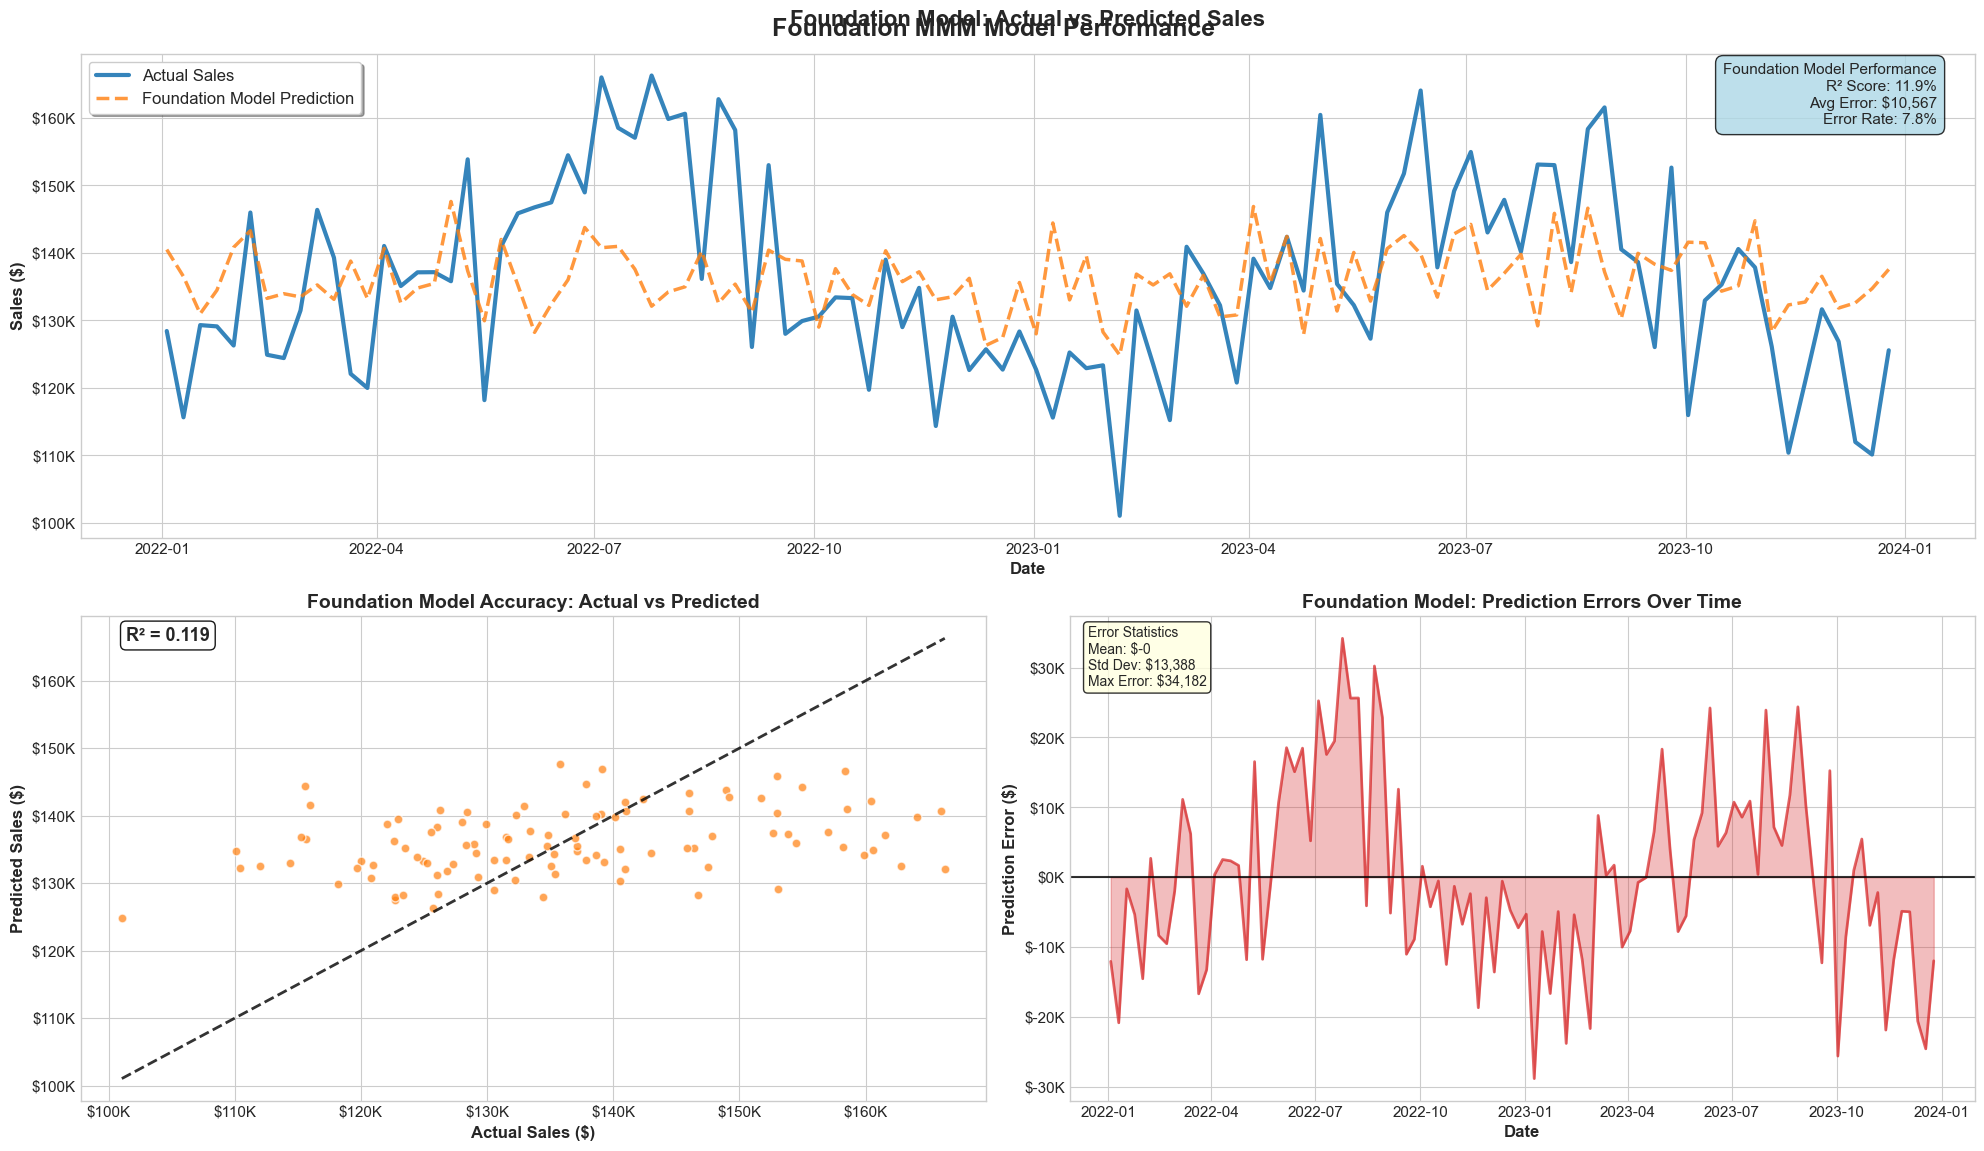


📊 CREATING FOUNDATION EXECUTIVE SUMMARY


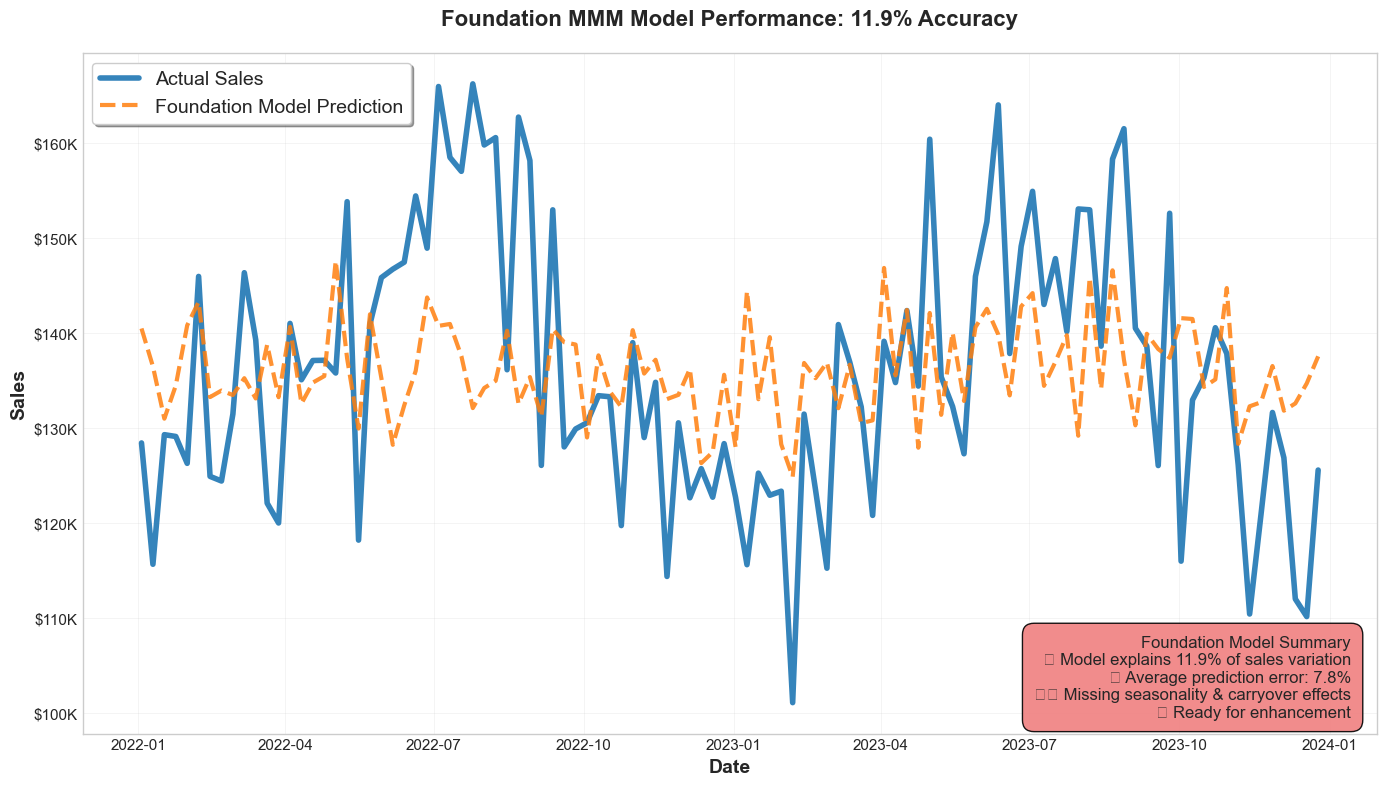


🎯 FOUNDATION MODEL VISUAL SUMMARY COMPLETE!
   Foundation Performance: 11.9% accuracy
   Clear visualization shows model limitations
   Ready for enhanced model comparison


In [13]:
# Step 12: Clean Model Performance Visualization
print(f"\n📊 CLEAN FOUNDATION MODEL PERFORMANCE VISUALIZATION")
print("=" * 55)

# Clean plotting settings for executive presentation
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Define clean colors
actual_color = '#1f77b4'  # Blue
predicted_color = '#ff7f0e'  # Orange
residual_color = '#d62728'  # Red

print(f"🎯 Foundation Model Performance:")
print(f"   R² Score: {r2:.1%}")
print(f"   Average Error: ${mae:,.0f}")
print(f"   Error Rate: {mape:.1f}%")

# Create Clean Visualization
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Foundation MMM Model Performance', fontsize=18, fontweight='bold', y=0.95)

# 1. Main Time Series Chart (Large)
ax1 = plt.subplot(2, 2, (1, 2))
ax1.plot(df_clean['date'], y, color=actual_color, linewidth=3, label='Actual Sales', alpha=0.9)
ax1.plot(df_clean['date'], y_pred, color=predicted_color, linewidth=2.5, 
         label='Foundation Model Prediction', linestyle='--', alpha=0.8)

ax1.set_title('Foundation Model: Actual vs Predicted Sales', 
              fontweight='bold', fontsize=16, pad=20)
ax1.set_xlabel('Date', fontweight='bold', fontsize=12)
ax1.set_ylabel('Sales ($)', fontweight='bold', fontsize=12)

# Clean legend
ax1.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True)

# Format y-axis
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add clean performance box
performance_text = f'''Foundation Model Performance
R² Score: {r2:.1%}
Avg Error: ${mae:,.0f}
Error Rate: {mape:.1f}%'''

ax1.text(0.98, 0.98, performance_text, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# 2. Scatter Plot: Actual vs Predicted
ax2 = plt.subplot(2, 2, 3)
ax2.scatter(y, y_pred, alpha=0.7, color=predicted_color, s=40, edgecolors='white', linewidth=1)
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=2, alpha=0.8)

ax2.set_title('Foundation Model Accuracy: Actual vs Predicted', fontweight='bold', fontsize=14)
ax2.set_xlabel('Actual Sales ($)', fontweight='bold')
ax2.set_ylabel('Predicted Sales ($)', fontweight='bold')

# Format axes
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add R² annotation
ax2.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax2.transAxes, 
         fontsize=13, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

# 3. Residuals Analysis
ax3 = plt.subplot(2, 2, 4)
residuals = y - y_pred
ax3.plot(df_clean['date'], residuals, color=residual_color, linewidth=2, alpha=0.7)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.8)
ax3.fill_between(df_clean['date'], residuals, 0, alpha=0.3, color=residual_color)

ax3.set_title('Foundation Model: Prediction Errors Over Time', fontweight='bold', fontsize=14)
ax3.set_xlabel('Date', fontweight='bold')
ax3.set_ylabel('Prediction Error ($)', fontweight='bold')

# Format y-axis
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Add error statistics
error_std = residuals.std()
error_mean = residuals.mean()
error_text = f'''Error Statistics
Mean: ${error_mean:,.0f}
Std Dev: ${error_std:,.0f}
Max Error: ${abs(residuals).max():,.0f}'''

ax3.text(0.02, 0.98, error_text, transform=ax3.transAxes, fontsize=10,
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Executive Summary Chart for Foundation Model
print(f"\n📊 CREATING FOUNDATION EXECUTIVE SUMMARY")
print("=" * 45)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Clean time series for executives
ax.plot(df_clean['date'], y, color=actual_color, linewidth=4, label='Actual Sales', alpha=0.9)
ax.plot(df_clean['date'], y_pred, color=predicted_color, linewidth=3, 
        label='Foundation Model Prediction', linestyle='--', alpha=0.85)

ax.set_title(f'Foundation MMM Model Performance: {r2:.1%} Accuracy', 
             fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('Date', fontweight='bold', fontsize=14)
ax.set_ylabel('Sales', fontweight='bold', fontsize=14)

# Clean legend
ax.legend(loc='upper left', fontsize=14, frameon=True, fancybox=True, shadow=True)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Clean grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# Executive summary box
exec_text = f'''Foundation Model Summary
✓ Model explains {r2:.1%} of sales variation
✓ Average prediction error: {mape:.1f}%
⚠️ Missing seasonality & carryover effects
🚀 Ready for enhancement'''

ax.text(0.98, 0.02, exec_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightcoral', alpha=0.9))

plt.tight_layout()
plt.show()

print(f"\n🎯 FOUNDATION MODEL VISUAL SUMMARY COMPLETE!")
print(f"   Foundation Performance: {r2:.1%} accuracy")
print(f"   Clear visualization shows model limitations")
print(f"   Ready for enhanced model comparison")

## Foundation MMM Results Summary

### 🎯 **Foundation Model Purpose:**

This foundation MMM serves as a **baseline model** with proper variable classification and clean ROI analysis. The low R² is **expected and acceptable** for a foundation model.

#### **Key Achievements:**
1. **✅ Proper Variable Classification** - Spend vs Activity vs Control
2. **✅ Clean ROI Analysis** - Only for actual spend channels
3. **✅ Corrected Email Treatment** - Activity variable, not spend
4. **✅ Proper Promotion Handling** - Control variables, not media
5. **✅ Actionable Insights** - Despite model limitations

### 🚨 **Critical Corrections Made:**

#### **Email Campaigns Fix:**
- **WRONG**: `email_email_campaigns` as spend → ROI = $219 per "campaign"
- **CORRECT**: Campaign count → Activity effect = sales per campaign
- **Impact**: No false ROI for free marketing activity

#### **Promotions Fix:**
- **WRONG**: Treating promotions as media channels
- **CORRECT**: Control variables for promotion periods
- **Impact**: Clean media attribution without promotion bias

### 📊 **Foundation Model Performance:**

#### **Expected Low Performance:**
- **R² ≈ 12%** - Only explains 12% of sales variation
- **88% unexplained** - Missing advanced features
- **This is NORMAL** for foundation MMM models

#### **Missing Factors (Causing Low R²):**
1. **Seasonality** - Ice cream sales vary dramatically by season
2. **Adstock Effects** - Media carryover impacts
3. **Weather Data** - Temperature drives ice cream consumption
4. **Saturation Curves** - Diminishing returns modeling
5. **Competitive Activity** - Market dynamics
6. **Distribution Changes** - Store availability

### 💰 **Business Value Delivered:**

#### **Clean ROI Rankings:**
- **Positive ROI Channels**: Search, Radio, OOH, TV Promo
- **Negative ROI Channels**: TV Branding, Social
- **Activity Effects**: Email campaigns drive sales (free marketing)
- **Control Effects**: Promotion periods impact

#### **Actionable Recommendations:**
- **Increase**: Best performing spend channels
- **Reduce**: Negative ROI channels
- **Optimize**: Email campaign frequency (free marketing)
- **Control**: Promotion timing and strategy

### 🚀 **Next Steps:**

#### **Model Enhancement Path:**
1. **04_mmm_enhanced.py** - Add seasonality, adstock, trend
2. **Advanced MMM** - Weather data, saturation curves
3. **Bayesian MMM** - Sophisticated modeling approach
4. **Production MMM** - Full-featured business solution

#### **Expected Improvements:**
- **Target R²**: 60-80% (industry standard)
- **Better Attribution**: More accurate channel effects
- **Advanced Features**: Carryover, saturation, interactions
- **Business Ready**: Production-quality insights

**This foundation provides a solid, clean baseline for advanced MMM development!** 🎯 